# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
# optimizers.SGD
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0717 07:39:42.130524 18288 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0717 07:39:42.131521 18288 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0717 07:39:42.169425 18288 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 07:39:42.170418 18288 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 07:39:42.173411 18288 

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.8247 - acc: 0.3446 - val_loss: 1.6946 - val_acc: 0.4052
Epoch 2/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5997 - acc: 0.4309 - val_loss: 1.6892 - val_acc: 0.3960
Epoch 3/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.5100 - acc: 0.4648 - val_loss: 1.5599 - val_acc: 0.4372
Epoch 4/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.4503 - acc: 0.4846 - val_loss: 1.5123 - val_acc: 0.4608
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.3987 - acc: 0.5014 - val_loss: 1.4892 - val_acc: 0.4687
Epoch 6/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.3578 - acc: 0.5163 - val_loss: 1.4315 - val_acc: 0.4975
Epoch 7/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.3226 - acc: 0.5304 - val_loss: 1.4340 - val_acc

50000/50000 [==============================] - 3s 55us/step - loss: 1.7933 - acc: 0.3706 - val_loss: 1.7421 - val_acc: 0.3988
Epoch 3/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.7082 - acc: 0.4028 - val_loss: 1.6930 - val_acc: 0.4070
Epoch 4/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.6514 - acc: 0.4222 - val_loss: 1.6287 - val_acc: 0.4287
Epoch 5/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.6076 - acc: 0.4380 - val_loss: 1.6020 - val_acc: 0.4373
Epoch 6/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5700 - acc: 0.4508 - val_loss: 1.5662 - val_acc: 0.4494
Epoch 7/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5385 - acc: 0.4622 - val_loss: 1.5398 - val_acc: 0.4610
Epoch 8/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5095 - acc: 0.4720 - val_loss: 1.5262 - val_acc: 0.4634
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.0065 - acc: 0.2944 - val_loss: 1.9848 - val_acc: 0.3066
Epoch 5/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.9644 - acc: 0.3136 - val_loss: 1.9464 - val_acc: 0.3214
Epoch 6/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.9310 - acc: 0.3246 - val_loss: 1.9161 - val_acc: 0.3324
Epoch 7/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.9031 - acc: 0.3356 - val_loss: 1.8909 - val_acc: 0.3433
Epoch 8/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.8791 - acc: 0.3456 - val_loss: 1.8705 - val_acc: 0.3434
Epoch 9/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.8592 - acc: 0.3521 - val_loss: 1.8515 - val_acc: 0.3601
Epoch 10/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.8413 - acc: 0.3589 - val_loss: 1.8352 - val_acc: 0.3615
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 3s 57us/step - loss: 2.2162 - acc: 0.1871 - val_loss: 2.2111 - val_acc: 0.1921
Epoch 6/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.2017 - acc: 0.2028 - val_loss: 2.1971 - val_acc: 0.2069
Epoch 7/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.1881 - acc: 0.2148 - val_loss: 2.1839 - val_acc: 0.2167
Epoch 8/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.1752 - acc: 0.2254 - val_loss: 2.1714 - val_acc: 0.2260
Epoch 9/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.1629 - acc: 0.2355 - val_loss: 2.1594 - val_acc: 0.2341
Epoch 10/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.1511 - acc: 0.2439 - val_loss: 2.1478 - val_acc: 0.2419
Epoch 11/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.1399 - acc: 0.2512 - val_loss: 2.1370 - val_acc: 0.2487
Epoch 12/50
50000/50000 [=========================

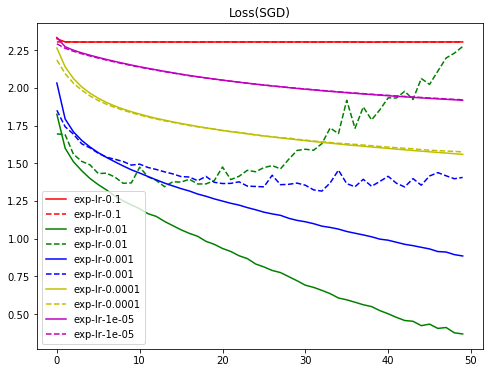

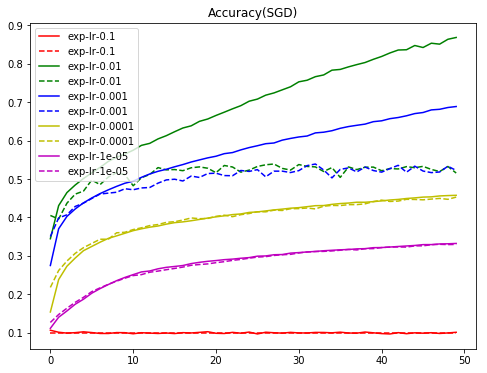

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss(SGD)")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy(SGD)")
plt.legend()
plt.show()

In [7]:
# optimizers.RMSprop
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0717 08:48:43.723448  7260 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0717 08:48:43.724419  7260 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0717 08:48:43.765170  7260 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 08:48:43.765170  7260 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 08:48:43.768145  7260 

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0717 08:48:43.975143  7260 deprecation.py:323] From C:\Users\vince\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 143us/step - loss: 14.4459 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 3s 64us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 62us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 63us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 65us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 63us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14

50000/50000 [==============================] - 3s 69us/step - loss: 14.4545 - acc: 0.0994 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 3s 63us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 62us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 63us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 62us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.8822 - acc: 0.3198 - val_loss: 1.8027 - val_acc: 0.3539
Epoch 3/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7772 - acc: 0.3604 - val_loss: 1.7238 - val_acc: 0.3885
Epoch 4/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.7069 - acc: 0.3896 - val_loss: 1.7682 - val_acc: 0.3510
Epoch 5/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6540 - acc: 0.4070 - val_loss: 1.7519 - val_acc: 0.3633
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6071 - acc: 0.4262 - val_loss: 1.7896 - val_acc: 0.3613
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5735 - acc: 0.4392 - val_loss: 1.6015 - val_acc: 0.4304
Epoch 8/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.5365 - acc: 0.4548 - val_loss: 1.6841 - val_acc: 0.3924
Epoch 9/50
50000/50000 [=================

50000/50000 [==============================] - 3s 63us/step - loss: 1.7111 - acc: 0.3968 - val_loss: 1.6451 - val_acc: 0.4189
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6559 - acc: 0.4141 - val_loss: 1.7109 - val_acc: 0.3714
Epoch 5/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.6060 - acc: 0.4334 - val_loss: 1.6648 - val_acc: 0.4086
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5698 - acc: 0.4445 - val_loss: 1.6268 - val_acc: 0.4229
Epoch 7/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5412 - acc: 0.4568 - val_loss: 1.7138 - val_acc: 0.3995
Epoch 8/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5103 - acc: 0.4653 - val_loss: 1.5895 - val_acc: 0.4326
Epoch 9/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4863 - acc: 0.4773 - val_loss: 1.5749 - val_acc: 0.4388
Epoch 10/50
50000/50000 [===========================

Epoch 5/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.7961 - acc: 0.3699 - val_loss: 1.7884 - val_acc: 0.3688
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.7670 - acc: 0.3818 - val_loss: 1.7668 - val_acc: 0.3778
Epoch 7/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.7425 - acc: 0.3904 - val_loss: 1.7497 - val_acc: 0.3861
Epoch 8/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.7209 - acc: 0.3998 - val_loss: 1.7160 - val_acc: 0.4055
Epoch 9/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7021 - acc: 0.4071 - val_loss: 1.7004 - val_acc: 0.4058
Epoch 10/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6849 - acc: 0.4121 - val_loss: 1.6924 - val_acc: 0.4097
Epoch 11/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.6691 - acc: 0.4186 - val_loss: 1.6796 - val_acc: 0.4185
Epoch 12/50
50000/50000 [==============

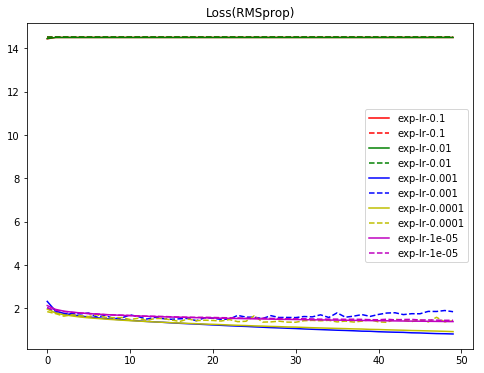

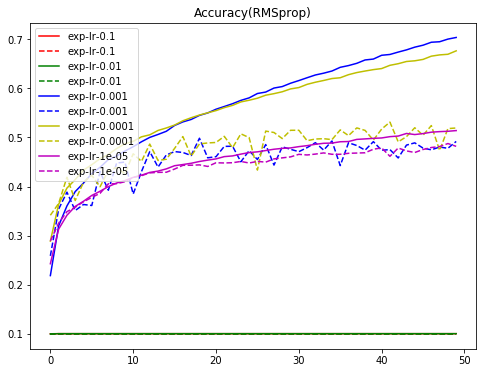

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss(RMSprop)")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy(RMSprop)")
plt.legend()
plt.show()

In [8]:
# optimizers.AdaGrad
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0717 09:04:20.781345 24196 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0717 09:04:20.940893 24196 deprecation.py:323] From C:\Users\vince\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 106us/step - loss: 14.4448 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 3s 61us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 63us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 61us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14

50000/50000 [==============================] - 3s 63us/step - loss: 14.4469 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5013 - acc: 0.1003 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 57us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.7871 - acc: 0.3669 - val_loss: 1.7684 - val_acc: 0.3676
Epoch 3/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.7130 - acc: 0.3972 - val_loss: 1.7168 - val_acc: 0.3876
Epoch 4/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.6662 - acc: 0.4163 - val_loss: 1.6775 - val_acc: 0.3985
Epoch 5/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.6316 - acc: 0.4277 - val_loss: 1.6516 - val_acc: 0.4164
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.6064 - acc: 0.4356 - val_loss: 1.6625 - val_acc: 0.4053
Epoch 7/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.5812 - acc: 0.4464 - val_loss: 1.6339 - val_acc: 0.4200
Epoch 8/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.5616 - acc: 0.4532 - val_loss: 1.5843 - val_acc: 0.4444
Epoch 9/50
50000/50000 [=================

50000/50000 [==============================] - 3s 57us/step - loss: 1.8935 - acc: 0.3429 - val_loss: 1.8817 - val_acc: 0.3439
Epoch 4/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.8639 - acc: 0.3546 - val_loss: 1.8588 - val_acc: 0.3532
Epoch 5/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.8428 - acc: 0.3625 - val_loss: 1.8389 - val_acc: 0.3575
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.8264 - acc: 0.3674 - val_loss: 1.8245 - val_acc: 0.3688
Epoch 7/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.8130 - acc: 0.3716 - val_loss: 1.8132 - val_acc: 0.3711
Epoch 8/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.8016 - acc: 0.3766 - val_loss: 1.8024 - val_acc: 0.3765
Epoch 9/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.7914 - acc: 0.3787 - val_loss: 1.7945 - val_acc: 0.3750
Epoch 10/50
50000/50000 [===========================

Epoch 5/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.1651 - acc: 0.2387 - val_loss: 2.1585 - val_acc: 0.2388
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.1531 - acc: 0.2440 - val_loss: 2.1475 - val_acc: 0.2462
Epoch 7/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.1427 - acc: 0.2490 - val_loss: 2.1378 - val_acc: 0.2496
Epoch 8/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.1334 - acc: 0.2525 - val_loss: 2.1290 - val_acc: 0.2536
Epoch 9/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.1249 - acc: 0.2560 - val_loss: 2.1210 - val_acc: 0.2584
Epoch 10/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.1171 - acc: 0.2596 - val_loss: 2.1136 - val_acc: 0.2612
Epoch 11/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.1099 - acc: 0.2624 - val_loss: 2.1068 - val_acc: 0.2636
Epoch 12/50
50000/50000 [==============

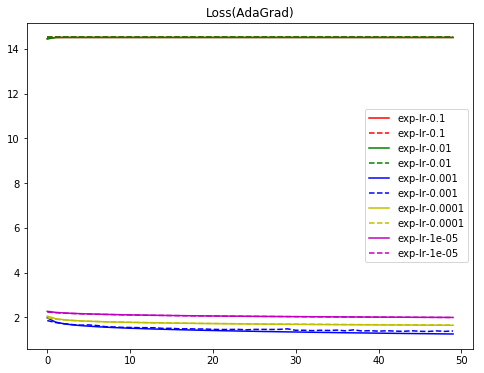

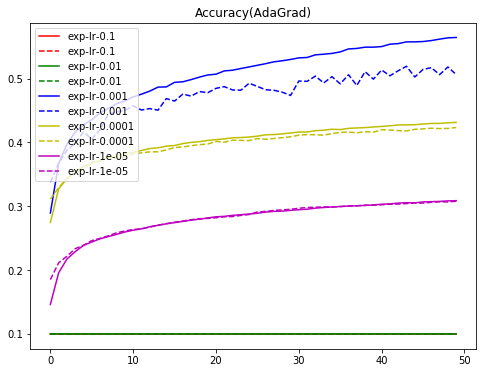

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss(AdaGrad)")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy(AdaGrad)")
plt.legend()
plt.show()

In [7]:
# optimizers.Adam
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0717 10:08:17.139724  6200 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0717 10:08:17.140696  6200 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0717 10:08:17.157675  6200 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 10:08:17.158672  6200 deprecation_wrapper.py:119] From C:\Users\vince\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 10:08:17.161639  6200 

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 68us/step - loss: 14.4349 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 3s 62us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 3s 61us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 3s 61us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 3s 62us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 62us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 3s 70us/step - loss: 1.9382 - acc: 0.3000 - val_loss: 1.7409 - val_acc: 0.3768
Epoch 2/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.7068 - acc: 0.3890 - val_loss: 1.6825 - val_acc: 0.4053
Epoch 3/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6196 - acc: 0.4234 - val_loss: 1.5610 - val_acc: 0.4483
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5573 - acc: 0.4450 - val_loss: 1.5698 - val_acc: 0.4512
Epoch 5/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5058 - acc: 0.4639 - val_loss: 1.5336 - val_acc: 0.4529
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4648 - acc: 0.4796 - val_loss: 1.5118 - val_acc: 0.4634
Epoch 7/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.4341 - acc: 0.4896 - val_loss: 1.4502 - val_acc: 0.4830
Epoch 8/50
50000/50000 [============================

Epoch 3/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6279 - acc: 0.4260 - val_loss: 1.6194 - val_acc: 0.4247
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5764 - acc: 0.4440 - val_loss: 1.5939 - val_acc: 0.4319
Epoch 5/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5350 - acc: 0.4588 - val_loss: 1.5338 - val_acc: 0.4604
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4937 - acc: 0.4728 - val_loss: 1.5173 - val_acc: 0.4691
Epoch 7/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4645 - acc: 0.4827 - val_loss: 1.4757 - val_acc: 0.4798
Epoch 8/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4377 - acc: 0.4938 - val_loss: 1.4644 - val_acc: 0.4806
Epoch 9/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4069 - acc: 0.5064 - val_loss: 1.4682 - val_acc: 0.4788
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 3s 64us/step - loss: 1.8139 - acc: 0.3693 - val_loss: 1.7934 - val_acc: 0.3756
Epoch 5/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7777 - acc: 0.3820 - val_loss: 1.7625 - val_acc: 0.3905
Epoch 6/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7504 - acc: 0.3915 - val_loss: 1.7371 - val_acc: 0.3978
Epoch 7/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7266 - acc: 0.4002 - val_loss: 1.7151 - val_acc: 0.4043
Epoch 8/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.7073 - acc: 0.4078 - val_loss: 1.6983 - val_acc: 0.4062
Epoch 9/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.6883 - acc: 0.4140 - val_loss: 1.6829 - val_acc: 0.4130
Epoch 10/50
50000/50000 [==============================] - 3s 65us/step - loss: 1.6721 - acc: 0.4193 - val_loss: 1.6665 - val_acc: 0.4188
Epoch 11/50
50000/50000 [==========================

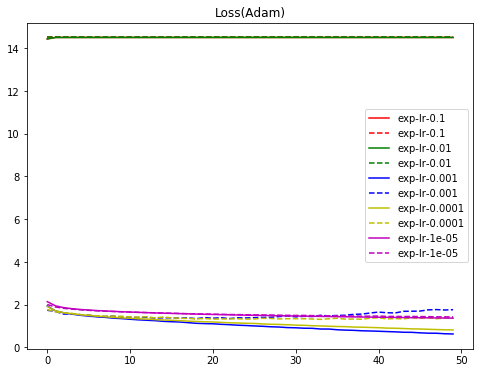

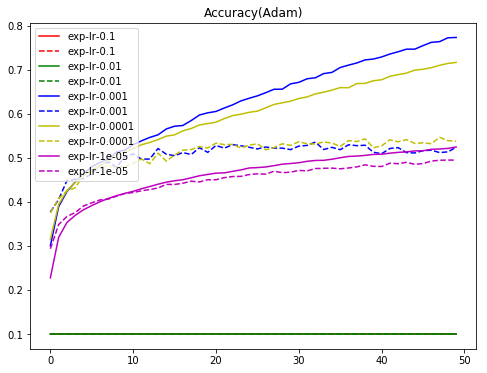

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss(Adam)")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy(Adam)")
plt.legend()
plt.show()